In [15]:
# 导入所需的库
import os
import csv
import datetime
import numpy as np
import pandas as pd
from math import fabs
import matplotlib.pyplot as plt
from surprise import Dataset,NMF, SVD, SVDpp
from surprise import accuracy, Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV, KFold, train_test_split

RMSE = 0.972


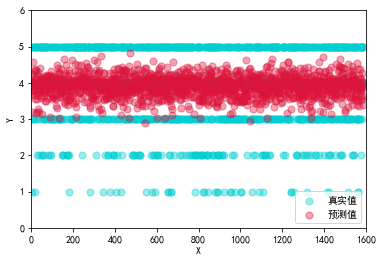

0:00:02.263911


In [11]:
# SVD算法模型

# 开始计时
start = datetime.datetime.now()
# 读取train.csv文件并初始化数据集
csv_file = "train.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
df = pd.DataFrame(csv_data)
df.drop(['date'], axis=1,inplace=True)


# 创建一个读取器，定义评分中的高低值
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df, reader)

# 按8:2划分训练集和测试集
trainset, testset = train_test_split(dataset, test_size=.2)
model = SVD(n_factors=100)

# 将SVD运行到数据集上
model.fit(trainset)

# 将模型运用到测试集上并评估预测结果
size = len(testset)
sum_RMSE = 0
cnt = 1
x = []
y_real = []
y_pred = []
for item in testset:
    user = item[0]
    business = item[1]
    real = item[2]
    pred = model.predict(user, business).est
    sum_RMSE += (pred-real)**2
    x.append(cnt)
    cnt += 1
    y_real.append(real)
    y_pred.append(pred)
RMSE = (sum_RMSE/size)**0.5
print("RMSE = {:.3f}".format(RMSE))

# 画图参数设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xmax=1600,xmin=0)
plt.ylim(ymax=6,ymin=0)
area = np.pi * 4**2  # 点面积 
colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'

# 绘制散点图
plt.scatter(x, y_real, s=area, c=colors1, alpha=0.4, label='真实值')
plt.scatter(x, y_pred, s=area, c=colors2, alpha=0.4, label='预测值')
plt.legend(loc='lower right')
plt.savefig(r'C:\Users\lenovo\Desktop\SVD.png', dpi=300)
plt.show()

# 计时结束
end = datetime.datetime.now()
print (end-start)

RMSE = 0.978


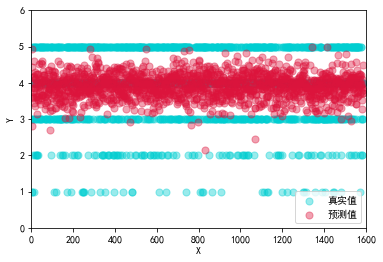

0:00:08.547840


In [18]:
# SVD++算法模型

# 开始计时
start = datetime.datetime.now()
# 读取train.csv文件并初始化数据集
csv_file = "train.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
df = pd.DataFrame(csv_data)
df.drop(['date'], axis=1,inplace=True)

# 创建一个读取器，定义评分中的高低值
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df, reader)

# 按8:2划分训练集和测试集
trainset, testset = train_test_split(dataset, test_size=.2)
model = SVDpp(n_factors=100)

# 将SVD++运行到数据集上
model.fit(trainset)

# 将模型运用到测试集上并评估预测结果
size = len(testset)
sum_RMSE = 0
cnt = 1
x = []
y_real = []
y_pred = []
for item in testset:
    user = item[0]
    business = item[1]
    real = item[2]
    pred = model.predict(user, business).est
    sum_RMSE += (pred-real)**2
    x.append(cnt)
    cnt += 1
    y_real.append(real)
    y_pred.append(pred)
RMSE = (sum_RMSE/size)**0.5
print("RMSE = {:.3f}".format(RMSE))

# 画图参数设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xmax=1600,xmin=0)
plt.ylim(ymax=6,ymin=0)
area = np.pi * 4**2  # 点面积 
colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'

# 绘制散点图
plt.scatter(x, y_real, s=area, c=colors1, alpha=0.4, label='真实值')
plt.scatter(x, y_pred, s=area, c=colors2, alpha=0.4, label='预测值')
plt.legend(loc='lower right')
plt.savefig(r'C:\Users\lenovo\Desktop\SVD++.png', dpi=300)
plt.show()

# 计时结束
end = datetime.datetime.now()
print (end-start)

RMSE = 1.222


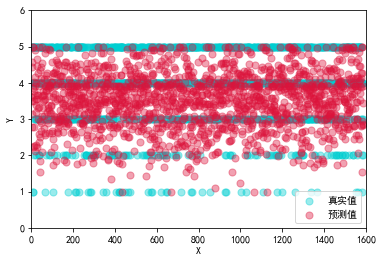

0:00:02.873391


In [30]:
# NMF算法模型

# 开始计时
start = datetime.datetime.now()
# 读取train.csv文件并初始化数据集
csv_file = "train.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
df = pd.DataFrame(csv_data)
df.drop(['date'], axis=1,inplace=True)

# 创建一个读取器，定义评分中的高低值
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df, reader)

# 按8:2划分训练集和测试集
trainset, testset = train_test_split(dataset, test_size=.2)
model = NMF()

# 将NMF运行到数据集上
model.fit(trainset)

# 将模型运用到测试集上并评估预测结果
size = len(testset)
sum_RMSE = 0
cnt = 1
x = []
y_real = []
y_pred = []
for item in testset:
    user = item[0]
    business = item[1]
    real = item[2]
    pred = model.predict(user, business).est
    sum_RMSE += (pred-real)**2
    x.append(cnt)
    cnt += 1
    y_real.append(real)
    y_pred.append(pred)
RMSE = (sum_RMSE/size)**0.5
print("RMSE = {:.3f}".format(RMSE))

# 画图参数设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xmax=1600,xmin=0)
plt.ylim(ymax=6,ymin=0)
area = np.pi * 4**2  # 点面积 
colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'

# 绘制散点图
plt.scatter(x, y_real, s=area, c=colors1, alpha=0.4, label='真实值')
plt.scatter(x, y_pred, s=area, c=colors2, alpha=0.4, label='预测值')
plt.legend(loc='lower right')
plt.savefig(r'C:\Users\lenovo\Desktop\NMF.png', dpi=300)
plt.show()

# 计时结束
end = datetime.datetime.now()
print (end-start)

In [35]:
# 调参

# 读取train.csv文件并初始化数据集
train_file = "train.csv"
train_data = pd.read_csv(train_file, low_memory = False)
train_df = pd.DataFrame(train_data)
train_df.drop(['date'], axis=1,inplace=True)
reader = Reader(rating_scale=(1, 5))
trainset = Dataset.load_from_df(train_df, reader)

# 指定参数选择范围
param_grid = {'n_epochs': [20, 50],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.04]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse',], cv=3)
gs.fit(trainset)

# 打印最好的均方根误差RMSE
print(gs.best_score['rmse'])

# 打印取得最好RMSE的参数集合
print(gs.best_params['rmse'])

0.9691592069116396
{'n_epochs': 50, 'lr_all': 0.002, 'reg_all': 0.02}


In [36]:
# 评分预测

# 读取train.csv文件并初始化数据集
train_file = "train.csv"
test_file = "test.csv"
train_data = pd.read_csv(train_file, low_memory = False)
test_data = pd.read_csv(test_file, low_memory = False)
train_df = pd.DataFrame(train_data)
train_df.drop(['date'], axis=1,inplace=True)
f = open('test1.csv','w',encoding='utf-8',newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(["user_id","business_id","date","pred_star"])
test_df = pd.read_csv(open('test.csv'))

# 创建一个读取器，定义评分中的高低值
reader = Reader(rating_scale=(1, 5))
trainset = Dataset.load_from_df(train_df, reader).build_full_trainset()

# 使用刚才最好的参数组合
model = SVD(n_factors=100, n_epochs=50, lr_all=0.002)

# 将SVD运行到数据集上
model.fit(trainset)

# 将模型运用到测试集上并预测结果
res = []
for index, row in test_df.iterrows():
    new_row = []
    new_row.append(row["user_id"])
    new_row.append(row["business_id"])
    new_row.append(row["date"])
    new_row.append("{:.2f}".format(model.predict(row["user_id"], row["business_id"]).est))
    res.append(new_row)
    
# 写入完毕
csv_writer.writerows(res)
f.close()
os.remove('test.csv')
os.rename('test1.csv', 'test.csv')
print('预测完成！')

预测完成！
